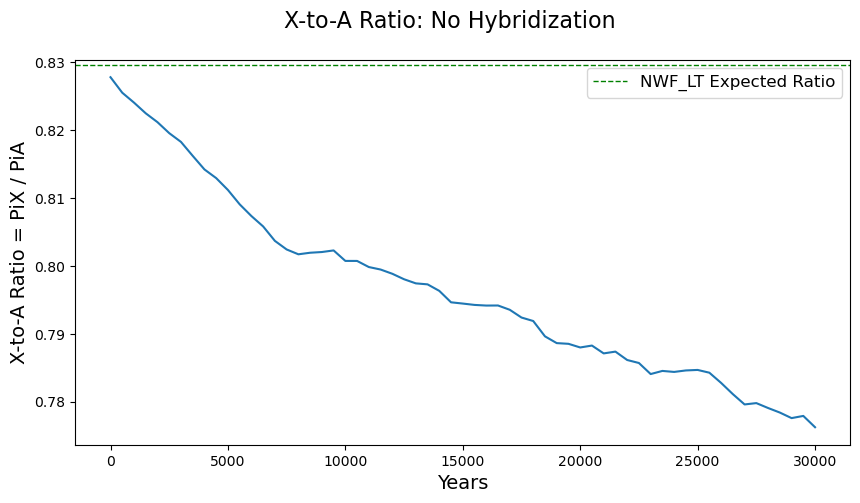

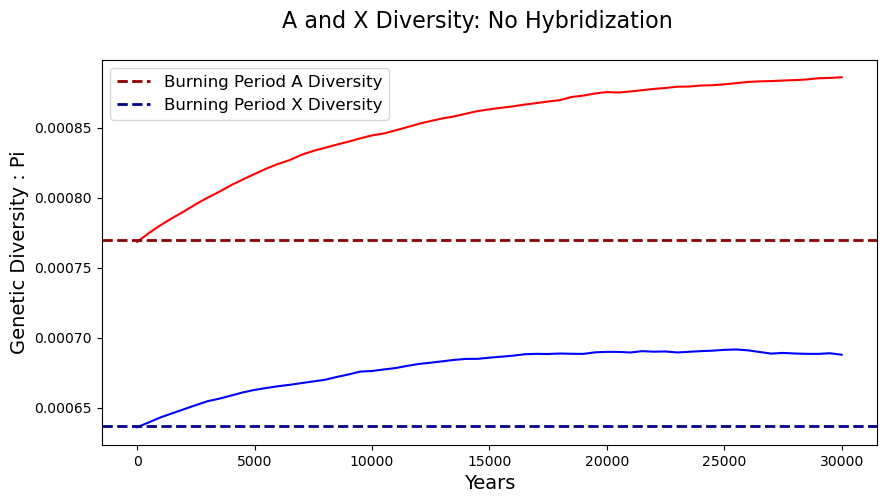

In [6]:
#Number of Migrants = 1

import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Hybridization/2SLiM_Files/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Hybridization/"

counter = 0

expected_ratio = 0.8296
SR = 0.5
Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
expected_teta = round (4*Ne*40*1.25e-8,10)
N = 61

L_XtoA = []
L_A = []
L_X = []
for NUM in range(1,21):
    XtoA = []
    A = []
    X = []
    File = FOLDER + f"NWFLT_Hyb_Pi_NBP{NUM}.txt"
    if os.path.isfile(File):
        with open(File, 'r', encoding='utf-8') as Text:
            for ligne in Text:
                Values = ligne.strip().split()
                if len(Values) > 1:
                    try:
                        XtoA.append(float(Values[1]) / float(Values[0]))
                        A.append(float(Values[0]))
                        X.append(float(Values[1]))
                    except (ValueError, ZeroDivisionError):
                        pass  # ou afficher un message d'erreur si tu veux
    if len(XtoA) == N:
        L_XtoA.append(XtoA)
        L_A.append(A)
        L_X.append(X)


XtoA_mean = [0 for j in range (N)]
A_mean = [0 for j in range (N)]
X_mean = [0 for j in range (N)]
for j in range (N):
    S = 0
    Sa = 0
    Sx = 0
    for el in L_XtoA: 
        S += el[j]
    for el in L_A: 
        Sa += el[j]
    for el in L_X: 
        Sx += el[j]
    XtoA_mean[j] = S/len(L_XtoA)
    A_mean[j] = Sa/len(L_A)
    X_mean[j] = Sx/len(L_X)
Steps = [500*j for j in range (N)]
    

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle(f"X-to-A Ratio: No Hybridization", fontsize=16)

ax.plot(Steps, XtoA_mean)
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio')
#ax.axhline(y=0.75, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio')
#ax.axhline(y=0.8293897929682634, color='orange', linestyle='--',linewidth=2, label='Burning Period Ratio')
#ax.axvline(x=tsep, color='red', linestyle='--', linewidth=1, label='Hybridization')
#ax.axvline(x=0, color='darkorange', linestyle=':', linewidth=2, label='Separation')
#ax.set_ylim([0.72,0.835])
ax.legend(fontsize=12)
#fig.savefig(FOLDER_output+f'Hyb_OM_{tsep}_{nmig}.png') 

mp.show()

print()
fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle(f"A and X Diversity: No Hybridization", fontsize=16)

ax.plot(Steps, A_mean,color = 'r')
ax.plot(Steps, X_mean,color = 'b')
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Genetic Diversity : Pi", fontsize=14)
ax.axhline(y=0.0007695915, color='darkred', linestyle='--',linewidth=2, label='Burning Period A Diversity')
ax.axhline(y=0.000636607, color='darkblue', linestyle='--',linewidth=2, label='Burning Period X Diversity')
#ax.axvline(x=tsep, color='red', linestyle='--', linewidth=1, label='Hybridization')
#ax.axvline(x=0, color='darkorange', linestyle=':', linewidth=2, label='Separation')
#ax.set_ylim([0.72,0.835])
ax.legend(fontsize=12)
#fig.savefig(FOLDER_output+f'Hyb_OM_{tsep}_{nmig}.png') 

mp.show()
          